In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report,roc_auc_score
from sklearn import metrics

# Keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Tu primer proyecto de Deep Learning en Python con Keras paso a paso.

Para este ejercicio usted debe:
- Defina el modelo de Keras.
- Compile el modelo de Keras.
- Compatible con el modelo Keras.
- Evalúe el modelo de Keras.
- Juntalo todo.

Recuerde que debe tener instalado:
- Tiene SciPy (incluido NumPy) instalado y configurado.
- Tiene Keras y un backend (Theano o TensorFlow) instalado y configurado.

Cree un nuevo archivo llamado
Mi_primera_red_keras_NOMBRE1_APELLIDO1_NOMBRE2_APELLIDO2.ipynb (.py). Adjunto
encontrará la base de datos y los detalles del set de datos.
Usted debe hacer lo siguiente:
1. Cargue las librerías que necesita
2. Importe la base de datos pima-indians-diabetes.csv
3. Defina la Base de datos, incluyendo medidas descriptivas y las variables que posee
(puede usar las data .names). Considere que la variable de salida (y) es 0,1.
4. Defina el modelo Keras
5. Utilice la función de activación de la unidad lineal rectificada denominada ReLU en las
dos primeras capas y la función Sigmoid en la capa de salida.
6. Compile el modelo Keras
7. Ajuste el modelo, considere epochs=150, batch_size=10
8. Evalúe el accuracy de su modelo, Comete.

In [ ]:
data=pd.read_csv('/content/diabetes (1).csv', delimiter = ',')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#normalizamos
data = data/data.max()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [ ]:
X = data.iloc[:,0:8].values
y = data['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
count_classes

2

In [ ]:
model = Sequential()  # constructor secuencial
model.add(Dense(100, activation='relu', input_dim=8)) # capa de entrada y el número de dimensiones de entrada. input: nuestro caso son 30 predictores
model.add(Dense(50, activation='relu')) # función de activación
model.add(Dense(2, activation='sigmoid'))

# Compilando el modelo
model.compile(optimizer='adam', # algoritmo optimizador #  La principal ventaja del optimizador "adam" es que no necesitamos especificar la tasa de aprendizaje y optimia la tasa de aprendizaje
              loss='categorical_crossentropy', # 'entropía cruzada categórica'
              metrics=['accuracy'])

In [ ]:
# build the model
model.fit(X_train, y_train, epochs=150, verbose = False,batch_size=10) # epochs: es el número de iteraciones de entrenamiento.

In [ ]:
pred_train= model.predict(X_train) # Predicción del entrenamiento
scores = model.evaluate(X_train, y_train, verbose=0) # Predicción del modelo
print('Accuracy con la data train: {}% \n El error de la data de entrenamiento es: {}'.format(scores[1], 1 - scores[1]))

pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy con la data test: {}% \n El error de la data de entrenamiento es: {}'.format(scores2[1], 1 - scores2[1]))

18/18 [==============================] - 0s 1ms/step
Accuracy con la data train: 0.8524305820465088% 
 El error de la data de entrenamiento es: 0.1475694179534912
6/6 [==============================] - 0s 2ms/step
Accuracy con la data test: 0.7447916865348816% 
 El error de la data de entrenamiento es: 0.2552083134651184


In [ ]:
y_prediction = np.argmax (pred_test, axis = 1)
y_test = np.argmax(y_test, axis=1)

cnf_matrix = metrics.confusion_matrix(y_test, y_prediction)
cnf_matrix

array([[111,  15],
       [ 34,  32]])

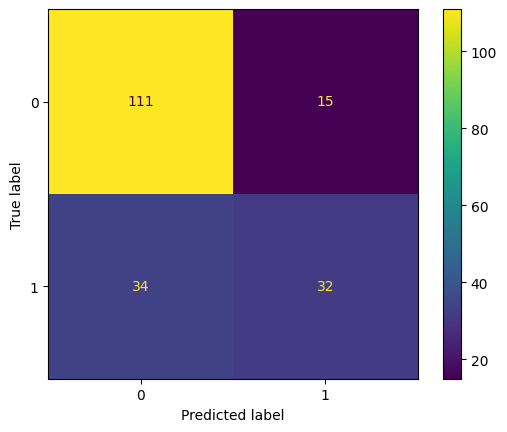

In [ ]:
ConfusionMatrixDisplay(cnf_matrix).plot();

In [ ]:
roc_auc = roc_auc_score(y_test, y_prediction)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Curva ROC - AUC del modelo:
0.6829004329004328


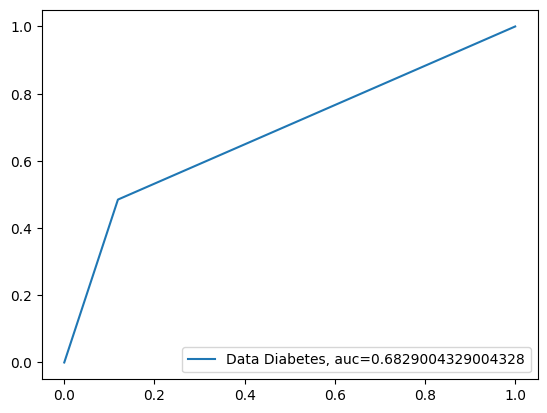

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_prediction)
auc = metrics.roc_auc_score(y_test, y_prediction)
plt.plot(fpr,tpr,label="Data Diabetes, auc="+str(auc))
plt.legend(loc=4)
plt.show()